<a href="https://colab.research.google.com/github/MaxMayer1991/StudyProjects/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Typowe etapy procesu machine learningowego**

Na przygotowanie użytecznego modelu ML składa się wiele etapów, z których każdy ma znaczny wpływ na wynik. Bez zrozumienia danych i odpowiedniego preprocessingu wynikowy model może być niskiej jakości, trudny w utrzymaniu i rozwoju. Na tych zajęciach skupimy się na krokach związanych z wybranie modelu i dopracowaniu go.


---


**Cele zajęć**


*   Zapoznanie się z etapami procesu ML.
*   Zaznajomienie się z przykładami klasyfikatorów (drzewo decyzyjne, random forest).
*   Próba ewaluacji wyników modelu i zrozumienia ich.
*   Zapisanie modelu w celu ponownego wykorzystania.



---



Poniżej przedstawiona jest przykładowa dekompozycja procesu ML na etapy:
1. „Look at the Big Picture”
2. Pozyskaj dane
3. Eksploruj i zwizualizuj dane, aby uzyskać wgląd w dane (EDA)
4. Przygotuj, przetwórz wstępnie dane w celu uruchomienia
algorytmu uczenia maszynowego
5. Wybierz model i wytrenuj go
6. Dopracuj swój model
7. Zaprezentuj swoje rozwiązanie
8. Uruchom, monitoruj i utrzymuj swój system


---


**1. „Look at the Big Picture”**
Ten krok można sparafrazować jako "określ swój cel biznesowy/naukowy". Skupiamy się tu na doprecyzowaniu problemu, jakim chcemy się zająć i jakich wyników się spodziewamy. Także tutaj możemy określić, czy nasz problem to raczej uczenie nadzorowane, czy nienadzorowane; czy zajmiemy się klasyfikacją, czy też np. regresją. Przykładowe problemy to:


*   Credit scoring - na podstawie zestawu cech klienta, określamy jaki jest jego score kredytowey, czy możemy mu przyznać kredyt i na jakich zasadach.
*   Ryzyko churnu - oceniamy, na ile prawdopodobnie klient od nas odejdzie (z banku/ platformy streamingowej/itp)
*   Wycena wartości portfela dłużników - kupując w ciemno pakiet długów, firma windykacyjna na podstawie jawnych cech wycenia, ile wart może być kupowany portfel.
*   Skutecznosć stosowania diety w chorobie miażdżycowej - przykład z naszych zajęć. Możemy szacować o ile zmieni się wartosć cholesterolu LDL (regresja) lub czy poziom choelsterolu wzrośnie (etykieta = 1) czy zmaleje (etykieta = 0).

**Jaki inny przykład problemu ML możesz podać?**

**Jaką wartość biznesową moze mieć problem omawiany na zajęciach?**



---



**2. Pozyskaj dane**
Dane wykorzystywane na zajęciach pochodzą z aplikacji Diet Planner i zostały udostępnione w ramach Otwartych Danych: https://dane.gov.pl/pl/dataset/3481,zbior-danych-umozliwiajacy-uczenie-sieci-sugerujac

Do opcjonalnych *walk modeli* (info na końcu) można wykorzystać plik datasetMultiLabel.xlsx


# Hands-on!
Zaimportuj biblioteki i dataset

**3. Eksploruj i zwizualizuj dane, aby uzyskać wgląd w dane (EDA)**

**4. Przygotuj, przetwórz wstępnie dane w celu uruchomienia
algorytmu uczenia maszynowego**

Ten etap szczegółowo był omawiany na poprzednich zajęciach, proszę potraktować ten element jako powtórzenie i w miarę możliwości - wykonać samodzielnie 🙂

In [10]:
import sklearn
import numpy as np
import os
import pandas as pd

def load_data():
    return pd.read_excel("sample_data/dataset.xlsx");

df = load_data()
df.head()

,Lp,Rodzaj stosowanej diety,Ilość posiłków w ciągu dnia,białko,tłuszcze,węglowodany,żelazo,sód,wapń,fosfor,...,wit. B6,wit. B7 - Biotyna,wit. B12,wit. C,wit. K,omega 6,cholesterol,błonnik pokarmowy,Cholesterol LDL,Scoring
0,"case,320",Jem wszystko,4,19,22,59,19.546002,2092.405952,1017.527083,1722.203452,...,2.926580,NaN,3.238821,328.598637,NaN,5.792023,370.375476,37.763637,0.1367,1
1,"case,321",Ketogeniczna,4,16,72,12,14.849472,2393.359857,704.758536,1339.139250,...,1.892477,3.701786,11.002286,191.472554,0.000429,8.423336,950.182857,13.884554,-0.1348,0
2,"case,322",Jem wszystko,5,18,29,53,17.961425,1158.236548,1105.186607,1678.602976,...,2.440289,NaN,2.315952,304.549869,NaN,7.507162,165.409881,36.104628,0.1772,1
3,"case,323",Wegetariańska,4,15,31,54,25.604958,1716.464881,1317.891429,1703.490833,...,3.120481,NaN,2.350086,431.513048,NaN,12.466657,194.187143,43.926143,0.0493,1
4,"case,324",Wegańska,5,14,40,46,33.296174,2574.069375,1620.502143,1586.660446,...,3.541992,NaN,0.933643,516.663464,NaN,13.072190,6.021429,62.087241,0.0340,1


In [11]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Spójrz na dane. Oceń przydatność cech. Wyczyść dane, jeśli uważasz, że to potrzebne.

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lp                           155 non-null    object 
 1   Rodzaj stosowanej diety      155 non-null    object 
 2   Ilość posiłków w ciągu dnia  155 non-null    int64  
 3   białko                       155 non-null    int64  
 4   tłuszcze                     155 non-null    int64  
 5   węglowodany                  155 non-null    int64  
 6   żelazo                       155 non-null    float64
 7   sód                          155 non-null    float64
 8   wapń                         155 non-null    float64
 9   fosfor                       155 non-null    float64
 10  potas                        155 non-null    float64
 11  magnez                       155 non-null    float64
 12  cynk                         155 non-null    float64
 13  jod                 

,Ilość posiłków w ciągu dnia,białko,tłuszcze,węglowodany,żelazo,sód,wapń,fosfor,potas,magnez,...,wit. B6,wit. B7 - Biotyna,wit. B12,wit. C,wit. K,omega 6,cholesterol,błonnik pokarmowy,Cholesterol LDL,Scoring
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,7.000000,155.000000,155.000000,8.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,4.251613,20.374194,33.400000,46.225806,20.911255,2354.404104,1125.427818,1847.300514,4983.351135,524.075728,...,3.276314,1.304779,4.745592,372.792930,0.000413,8.496492,405.401291,37.988363,0.081248,0.709677
std,0.810592,3.719287,13.961264,15.143705,3.806062,555.809641,266.523232,313.320608,1073.798806,100.225333,...,0.816583,1.964699,2.871841,106.034592,0.000204,2.615642,252.839142,8.843226,0.119447,0.455383
min,3.000000,12.000000,13.000000,4.000000,11.005233,1158.236548,590.883393,1082.667714,2031.722458,223.087964,...,1.390495,0.117857,0.933643,82.853894,0.000214,4.000376,6.021429,11.073948,-0.303400,0.000000
25%,4.000000,18.000000,26.000000,44.500000,18.402707,1954.877173,967.855149,1631.913035,4410.958512,468.327232,...,2.796598,0.117857,2.987000,303.625434,0.000279,6.699441,231.883452,34.524280,-0.009300,0.000000
50%,4.000000,20.000000,29.000000,52.000000,20.734231,2226.062143,1120.581071,1811.514821,4837.911786,525.459137,...,3.120481,0.235714,3.728893,364.168345,0.000429,7.829906,316.015714,38.411125,0.100600,1.000000
75%,5.000000,22.000000,34.500000,55.000000,22.942939,2704.878899,1311.305120,2018.295000,5628.835447,584.372857,...,3.838398,1.968750,5.492821,434.197473,0.000429,9.906852,462.521786,43.396320,0.167700,1.000000
max,6.000000,31.000000,78.000000,69.000000,36.160330,4403.998393,1756.070952,2925.653214,9321.298690,842.597262,...,6.404388,4.606667,19.947143,757.729964,0.000857,19.969246,1182.101429,62.087241,0.322000,1.000000


Sprawdźmy, gdzie mamy brakujące dane za pomocą wizauliacji.

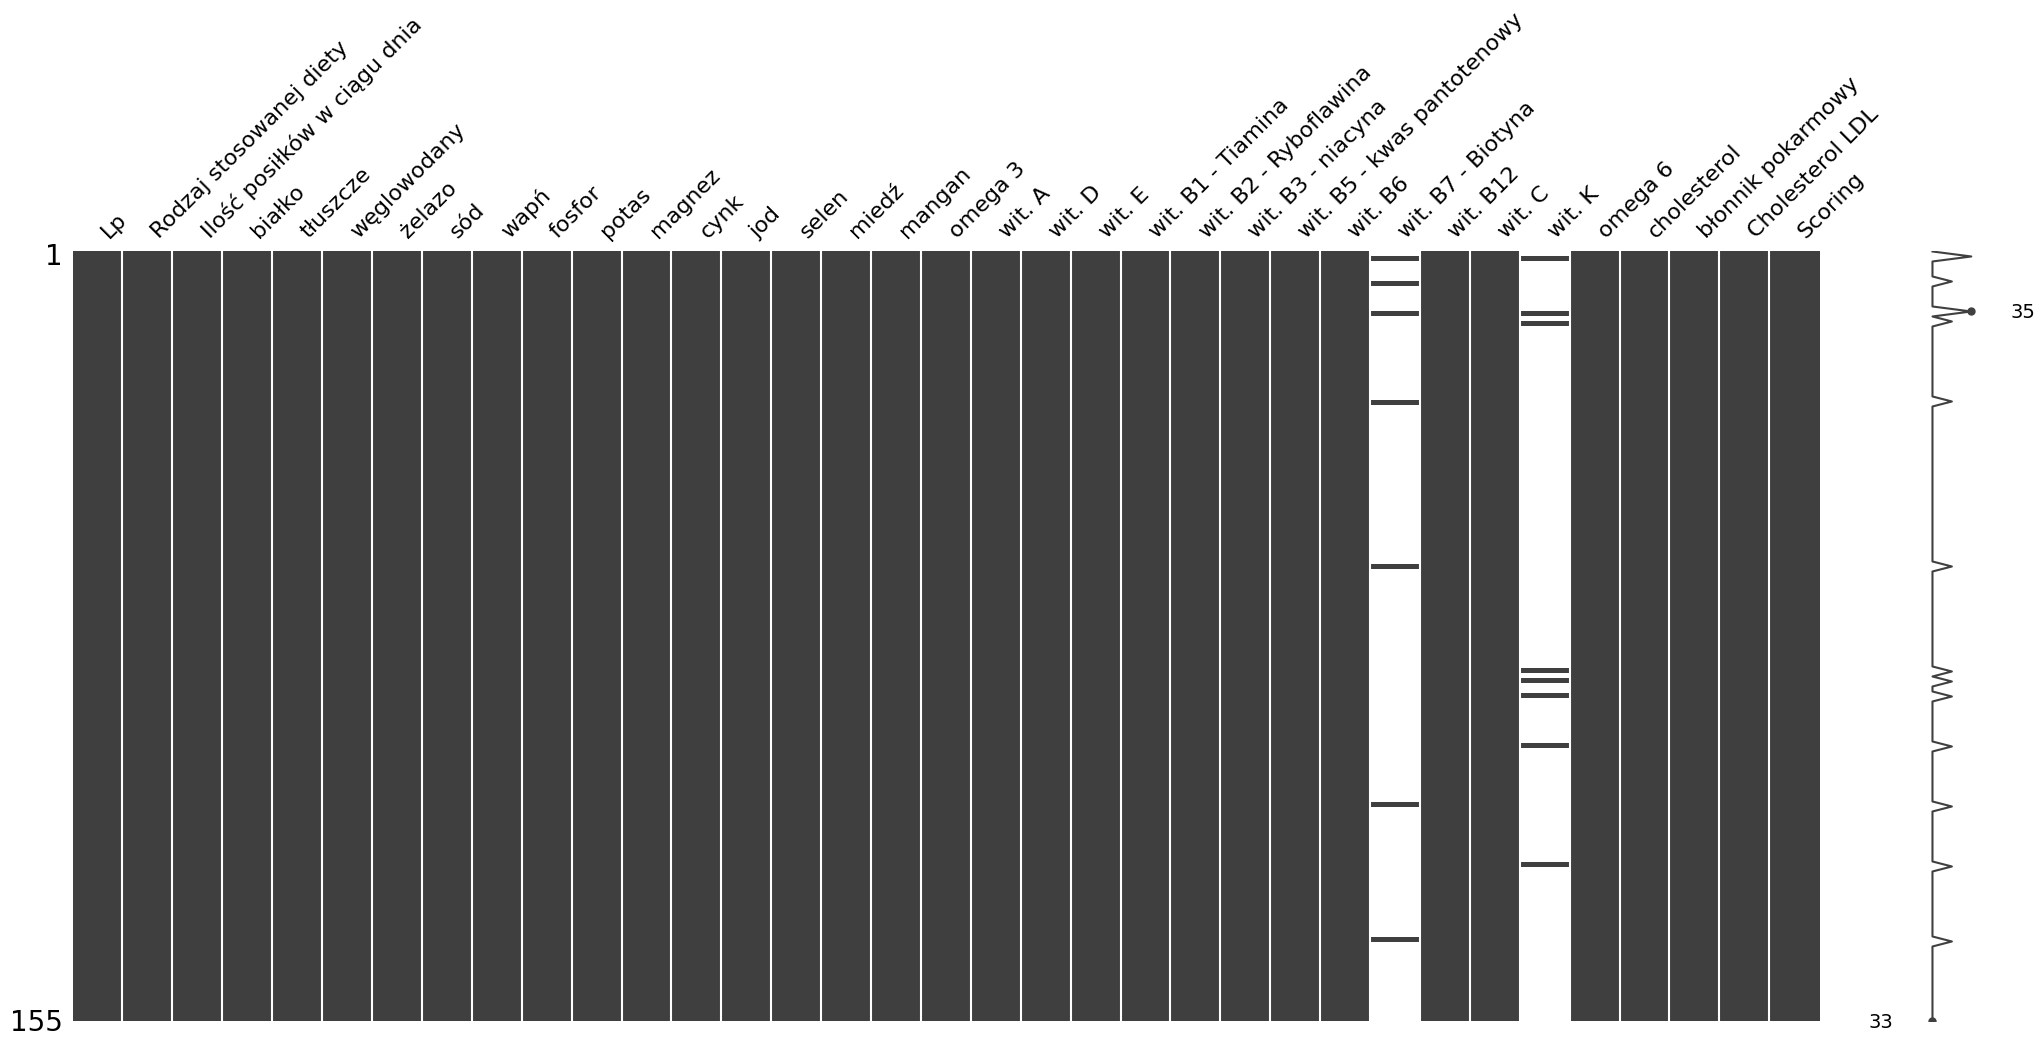

In [13]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

Dla cech "wit. K" oraz "wit. B7 - Biotyna" występują znaczące braki, co może wpłynąć na jakość modelu, a w przypadku bardzo rozbudowanych wektorów cech - na klęskę wymiarowości. Możemy to ryzyko zminimalizowac usuwając te cechy.

**W jaki sposób można postąpić, gdy wartości brakuje na nielicznych obserwacjach?**

**Na czym polega klęska wymiarowości?**

Odpowieź:
W przypadku gdy brakuje wartości na nielicznych obserwacjach można usunąć dane z obserwacji, uzupełnić braki wartościami zbliżonymi, medianą, średnią lub dominantną, także można uzupełnić wartością następnej lub poprzedniej. Za pomocą regresji można przewidzieć brakujące wartości na podstawie innych dostępnych zmiennych.

Przekleństwo wymiarowości odnosi się do wielu właściwości przestrzeni wielowymiarowych i problemów kombinatorycznych.

Problemy z uczeniem maszynowym, które obejmują trenowanie „stanu naturalnego” na skończonej liczbie próbek danych w wielowymiarowej przestrzeni cech, zazwyczaj wymagają dużej ilości danych uczących, aby zapewnić co najmniej kilka próbek o różnych kombinacjach wartości. Typową zasadą jest, że w każdym wymiarze powinno być co najmniej 5 przykładów szkoleniowych. Przy ustalonej liczbie próbek uczących moc predykcyjna klasyfikatora lub regresora początkowo wzrasta wraz ze wzrostem liczby zastosowanych wymiarów/cech, ale następnie maleje, co jest znane jako zjawisko Hughesa lub zjawisko szczytu.

In [14]:
df = df.drop('wit. K', axis=1)
df = df.drop('wit. B7 - Biotyna', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lp                           155 non-null    object 
 1   Rodzaj stosowanej diety      155 non-null    object 
 2   Ilość posiłków w ciągu dnia  155 non-null    int64  
 3   białko                       155 non-null    int64  
 4   tłuszcze                     155 non-null    int64  
 5   węglowodany                  155 non-null    int64  
 6   żelazo                       155 non-null    float64
 7   sód                          155 non-null    float64
 8   wapń                         155 non-null    float64
 9   fosfor                       155 non-null    float64
 10  potas                        155 non-null    float64
 11  magnez                       155 non-null    float64
 12  cynk                         155 non-null    float64
 13  jod                 

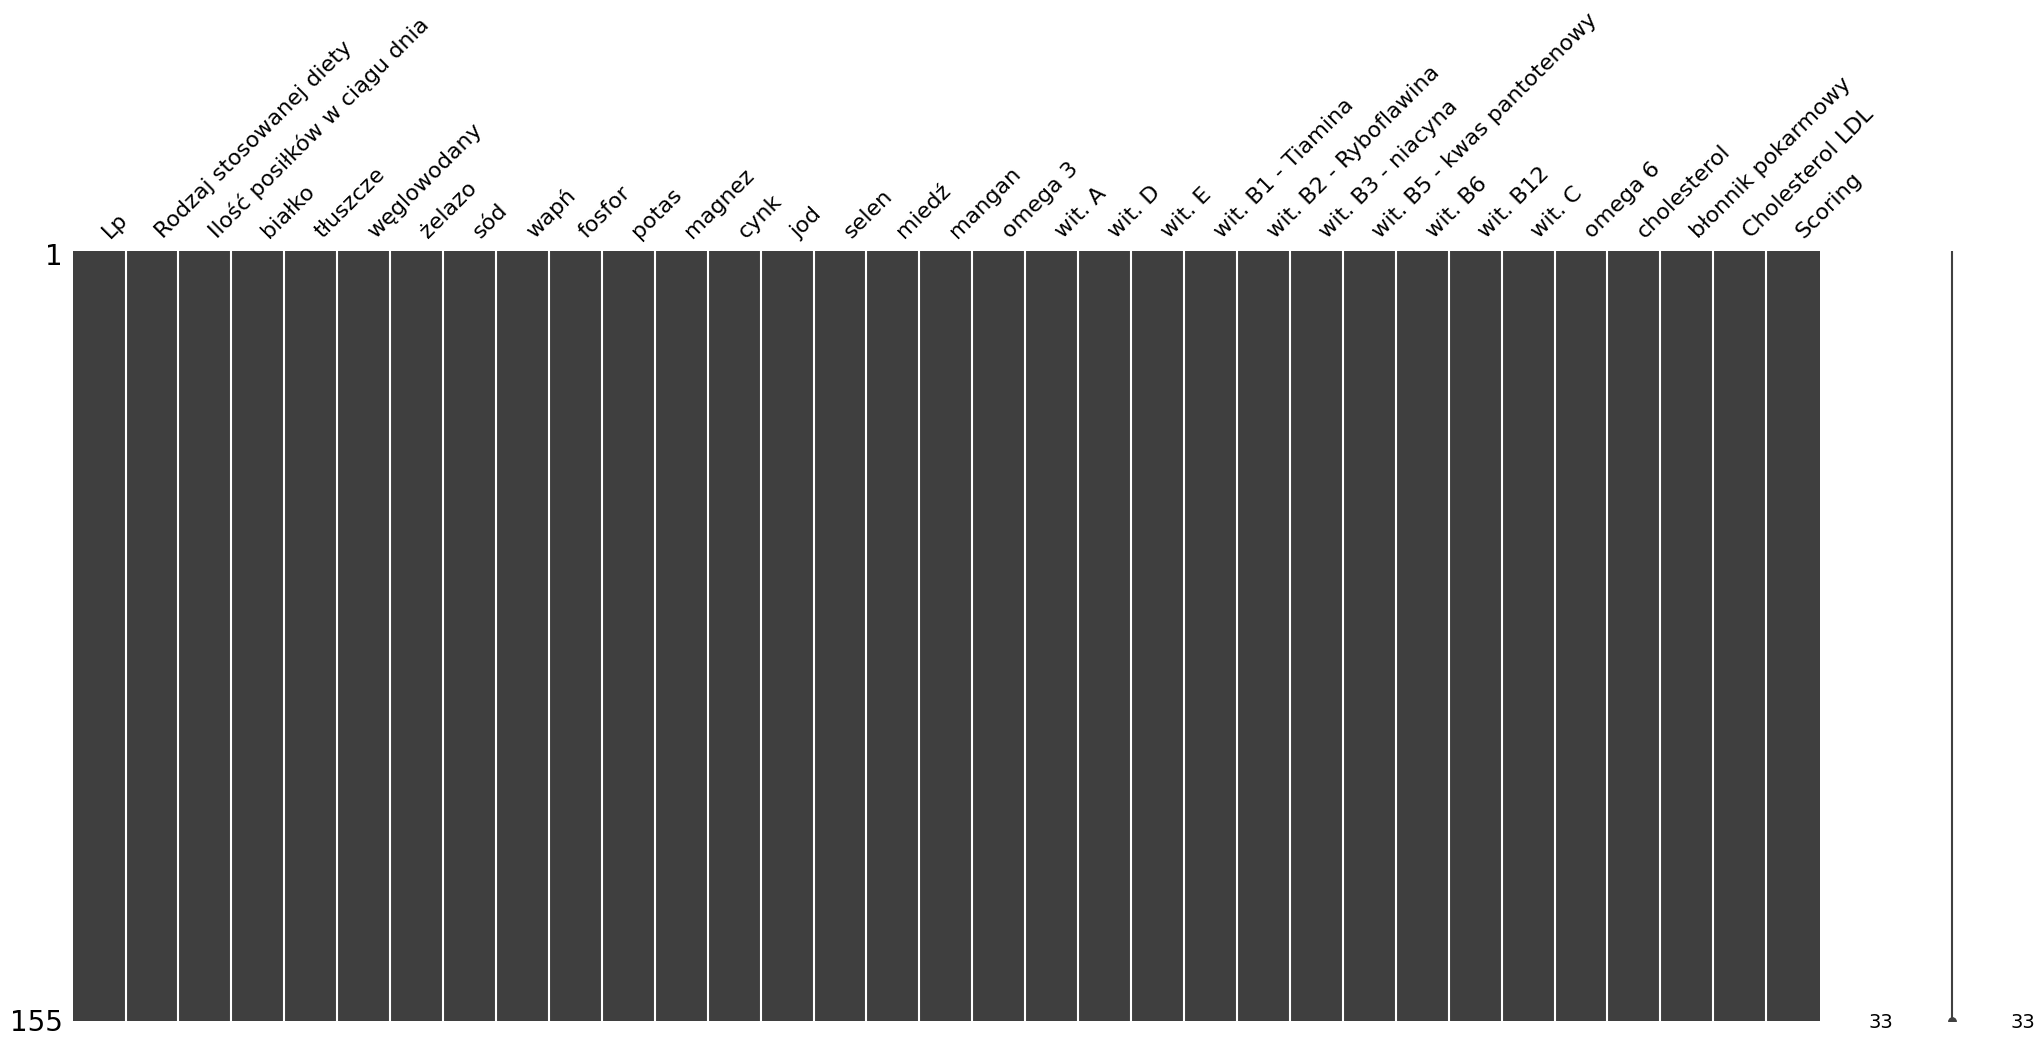

In [15]:
msno.matrix(df)
plt.show()

Warto też sprawdzić korelację cech - być może pewne cechy są bardzo mocno skorelowane ze sobą - multicollinearity.

In [16]:
correlation_matrix = df.iloc[:, 2:31].corr()
print(correlation_matrix)


#mozna takze skorzystac z wizualizacji - uzycie seaborna i heatmapy

                             Ilość posiłków w ciągu dnia    białko  tłuszcze  \
Ilość posiłków w ciągu dnia                     1.000000 -0.276972 -0.218384   
białko                                         -0.276972  1.000000  0.198184   
tłuszcze                                       -0.218384  0.198184  1.000000   
węglowodany                                     0.269357 -0.428309 -0.970593   
żelazo                                          0.075347  0.238963 -0.085959   
sód                                            -0.118730  0.664031  0.253912   
wapń                                            0.648747 -0.284130 -0.434937   
fosfor                                          0.195870  0.440727 -0.232836   
potas                                           0.073287  0.364823 -0.329064   
magnez                                          0.276533  0.064166 -0.525884   
cynk                                            0.168220  0.350520 -0.168289   
jod                                     

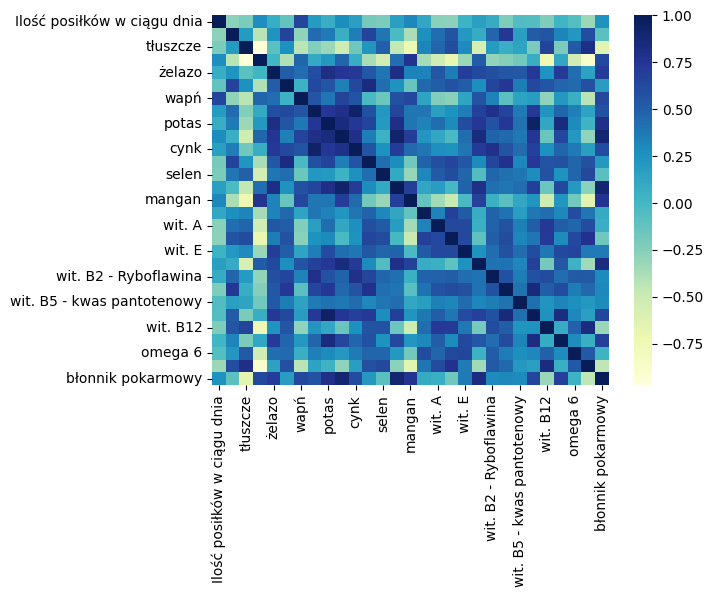

In [17]:
import seaborn as sns
heatmap = sns.heatmap(correlation_matrix, fmt='.0f', cmap="YlGnBu")

plt.show()

Przekodowanie zmiennych kategorycznych - modele oczekują zmiennych numerycznych, więc konieczne jest przekodowanie cechy "Rodzaj stosowanej diety"

Metody przekodowania zmiennych kategorycznych:

*   One-hot encoding: Tworzy nową kolumnę dla każdej wartości kategorii.
*   Label encoding: Zamienia wartości kategorii na liczby całkowite.
*   Ordinal encoding: Zamienia wartości kategorii na liczby całkowite uwzględniające naturalny porządek

**Proszę podać przykład, gdzie można zastosować ordinal encoding**

Przykładem Ordinal encoding można rozważyć zmianę wartości kategorii Wiek z "Młody" - "1.0" porządek, "Dojrzały" - "2.0" porządek, "Senior" - "3.0" porządek. Waga "Niska" - "1.0", "Średnia" - "2.0", "Wysoka" - "3.0", "Ponad wysoka" - "4.0".

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Rodzaj stosowanej diety'] = encoder.fit_transform(df['Rodzaj stosowanej diety'])

df.head()

,Lp,Rodzaj stosowanej diety,Ilość posiłków w ciągu dnia,białko,tłuszcze,węglowodany,żelazo,sód,wapń,fosfor,...,wit. B3 - niacyna,wit. B5 - kwas pantotenowy,wit. B6,wit. B12,wit. C,omega 6,cholesterol,błonnik pokarmowy,Cholesterol LDL,Scoring
0,"case,320",2,4,19,22,59,19.546002,2092.405952,1017.527083,1722.203452,...,21.894461,0.742400,2.926580,3.238821,328.598637,5.792023,370.375476,37.763637,0.1367,1
1,"case,321",3,4,16,72,12,14.849472,2393.359857,704.758536,1339.139250,...,17.715720,0.824935,1.892477,11.002286,191.472554,8.423336,950.182857,13.884554,-0.1348,0
2,"case,322",2,5,18,29,53,17.961425,1158.236548,1105.186607,1678.602976,...,15.008776,0.454653,2.440289,2.315952,304.549869,7.507162,165.409881,36.104628,0.1772,1
3,"case,323",6,4,15,31,54,25.604958,1716.464881,1317.891429,1703.490833,...,18.027975,1.186439,3.120481,2.350086,431.513048,12.466657,194.187143,43.926143,0.0493,1
4,"case,324",5,5,14,40,46,33.296174,2574.069375,1620.502143,1586.660446,...,23.631698,1.613715,3.541992,0.933643,516.663464,13.072190,6.021429,62.087241,0.0340,1


# Wybór modelu, wytrenowanie go i ewaluacja wyników

**5. Wybierz model i wytrenuj go**

Pora na przygotowanie naszego modelu i ocenienie go. W uczeniu maszynowym dane są kluczowe - wydawałoby się, że w takim razie powinniśmy nakarmić model wszystkimi możliwymi danymi, żeby "poznał" jak najwięcej obserwacji. Robiąc tak stracimy możliwosć oceny, jak model radzi sobie w środowisku produkcyjnym, gdzie będzie musiał działać na nowych przypadkach - nie będziemy wiedzieć, na ile dobrze radzi sobie z uogólnieniem obserwacji.

Dobry podział zbióry na treningowy i testowy pozwoli na lepszą ewaluację jakości modelu, zapobiegnięcie overfittingowi, a także posłuży przy doborze hiperparametrów.

**Jakie są typowe proporcje podziału zbioru na train/test?**

60-80% - danych zbioru dla trenowania modelu, 20-40% - danych zbioru dla testowania.

**Co jeżeli mamy istotną nadreprezentację wybranej klasy?**

W takim przypadku model może ignorować pozostałe klasy (Stronniczość modelu), model będzie „nauczony” przewidywać częściej nadreprezentowaną klasę, ponieważ minimalizuje to błąd na zbiorze treningowy. Skutkuje to również błędną ocene jakości w przypadku metryki "dokładność" model może ośiągnąć wysoką dokładność w wyniku przewidywania tylko klasy większościową, mimo że nie radzi sobie z wykrywaniem klasy mniejszościowej.

Aby zminimalizować nadprezentacji klasy można zastosować metody "Równoważania próbek" - "Powielanie przykładów klasy mniejszościowej" (oversampling), aby zrównoważyć proporcji lub "Podwybieranie klasy większościowej" (undersampling) w tym zmniejszenie liczby przykładów klasy większościowej, aby proporcje były bardziej zbliżone.
Metody syntetyczne SMOTE (Synthetic Minority Over-sampling Technique): Tworzenie syntetycznych przykładów klasy mniejszościowej, aby zwiększyć jej liczebność.
Zastosowanie innych metryk oceny:
Zamiast klasycznej dokładności, stosuje się precyzję, czułość, F1-score lub matrycę konfuzji, które lepiej oddają skuteczność modelu w warunkach niezbalansowanych danych.
Modelowanie z wagami klas:
Wiele algorytmów umożliwia przypisanie większej wagi klasie mniejszościowej, aby model bardziej uwzględniał mniej liczną klasę podczas uczenia.

Przykład underfittingu (na podstawie danych z Biura Informacji Kredytowej):
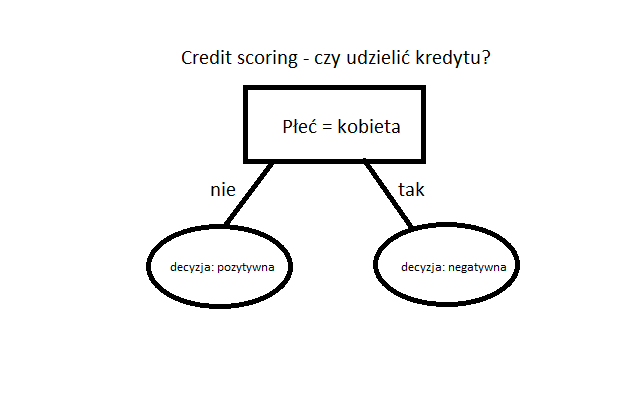

Przykład overfittingu (dopasowanie się do pojedynczych wsytąpień):
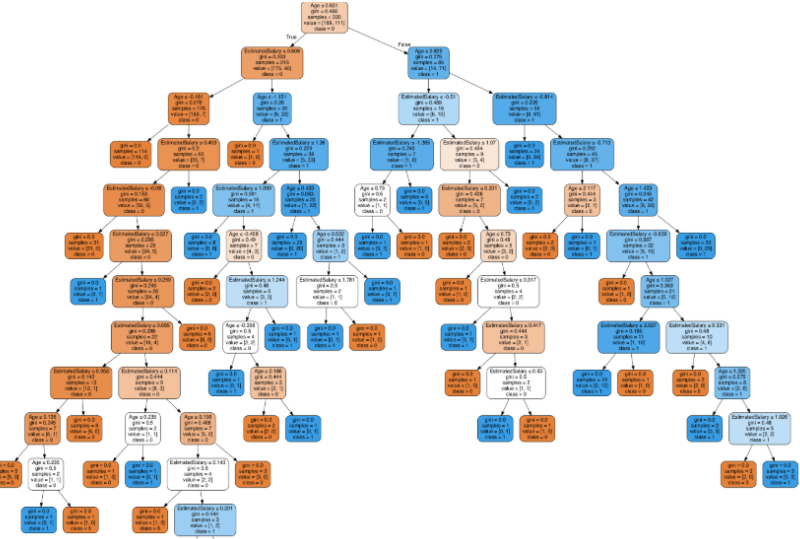


Podziel zbiór danych na testowy, treningowy.

In [19]:
#przygotowujemy cechy:
X = df.iloc[:, 1:31]
X.head()

,Rodzaj stosowanej diety,Ilość posiłków w ciągu dnia,białko,tłuszcze,węglowodany,żelazo,sód,wapń,fosfor,potas,...,wit. B1 - Tiamina,wit. B2 - Ryboflawina,wit. B3 - niacyna,wit. B5 - kwas pantotenowy,wit. B6,wit. B12,wit. C,omega 6,cholesterol,błonnik pokarmowy
0,2,4,19,22,59,19.546002,2092.405952,1017.527083,1722.203452,4941.080357,...,1.776299,2.280515,21.894461,0.742400,2.926580,3.238821,328.598637,5.792023,370.375476,37.763637
1,3,4,16,72,12,14.849472,2393.359857,704.758536,1339.139250,2598.309536,...,0.924358,2.613362,17.715720,0.824935,1.892477,11.002286,191.472554,8.423336,950.182857,13.884554
2,2,5,18,29,53,17.961425,1158.236548,1105.186607,1678.602976,3972.603542,...,1.639357,2.082224,15.008776,0.454653,2.440289,2.315952,304.549869,7.507162,165.409881,36.104628
3,6,4,15,31,54,25.604958,1716.464881,1317.891429,1703.490833,4800.483333,...,1.811179,2.327595,18.027975,1.186439,3.120481,2.350086,431.513048,12.466657,194.187143,43.926143
4,5,5,14,40,46,33.296174,2574.069375,1620.502143,1586.660446,5628.485893,...,2.194285,1.879283,23.631698,1.613715,3.541992,0.933643,516.663464,13.072190,6.021429,62.087241


In [20]:
#przygotowujemy klasy
y = df["Scoring"]
y.head()

,Scoring
0,1
1,0
2,1
3,1
4,1


In [22]:
#zbior test/train 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wyświetlenie rozmiarów podzbiorów
print("Rozmiar zestawu treningowego:", X_train.shape)
print("Rozmiar zestawu testowego:", X_test.shape)
print("Rozmiar pierwotnego setu:", df.shape)

Rozmiar zestawu treningowego: (124, 30)
Rozmiar zestawu testowego: (31, 30)
Rozmiar pierwotnego setu: (155, 33)


Za pomocą losowych, wybranych przez siebie hiperparametrów wytrenuj model [1]

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve,precision_score, recall_score,f1_score, ConfusionMatrixDisplay

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

model1_predictions = model1.predict(X_test)
print("Dokładność modelu z losowymi hiperparametrami: ", accuracy_score(y_test, model1_predictions))

Dokładność modelu z losowymi hiperparametrami:  0.8709677419354839


**Praca samodzielna:** Wytrenuj model na innych proporcjach zbiorów train/test:


*   70%/30%
*   95%/5%
*   50%/50%

Zapisz wynik accuracy dla każdego przypadku. Jak ta wartość się zmienia?

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve,precision_score, recall_score,f1_score, ConfusionMatrixDisplay

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.05, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.5, random_state=42)
# Wyświetlenie rozmiarów podzbiorów
print("Rozmiar zestawu treningowego 1:", X_train1.shape)
print("Rozmiar zestawu testowego 1:", X_test1.shape)
print("Rozmiar pierwotnego setu 1:", df.shape)
print("\nRozmiar zestawu treningowego 2:", X_train2.shape)
print("Rozmiar zestawu testowego 2:", X_test2.shape)
print("Rozmiar pierwotnego setu 2:", df.shape)
print("\nRozmiar zestawu treningowego 3:", X_train3.shape)
print("Rozmiar zestawu testowego 3:", X_test3.shape)
print("Rozmiar pierwotnego setu 3:", df.shape)

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train1,y_train1)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train2,y_train2)

model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train3,y_train3)

model1_predictions = model1.predict(X_test1)
print(f"\nWynik accuracy dla modelu 1: {accuracy_score(y_test1, model1_predictions)}")

model2_predictions = model2.predict(X_test2)
print(f"\nWynik accuracy dla modelu 2: {accuracy_score(y_test2, model2_predictions)}")

model3_predictions = model3.predict(X_test3)
print(f"\nWynik accuracy dla modelu 3: {accuracy_score(y_test3, model3_predictions)}")

Rozmiar zestawu treningowego 1: (108, 30)
Rozmiar zestawu testowego 1: (47, 30)
Rozmiar pierwotnego setu 1: (155, 33)

Rozmiar zestawu treningowego 2: (147, 30)
Rozmiar zestawu testowego 2: (8, 30)
Rozmiar pierwotnego setu 2: (155, 33)

Rozmiar zestawu treningowego 3: (77, 30)
Rozmiar zestawu testowego 3: (78, 30)
Rozmiar pierwotnego setu 3: (155, 33)

Wynik accuracy dla modelu 1: 0.8723404255319149

Wynik accuracy dla modelu 2: 0.875

Wynik accuracy dla modelu 3: 0.8974358974358975


Alternatywny model o zdefiniowanej maksymalnej głębokości:

In [25]:
model2 = DecisionTreeClassifier(random_state=2, max_depth=12)
model2.fit(X_train,y_train)

model2_predictions = model2.predict(X_test)
accuracy_score(y_test, model2_predictions)

0.9032258064516129

**Praca samodzielna:** Wytrenuj model na zbiorach train/test wybranych z opcją stratify.

Zapisz wynik accuracy. Jak ta wartość się zmienia?

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve,precision_score, recall_score,f1_score, ConfusionMatrixDisplay

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.05, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.5, random_state=42)
X_train1_1, X_test1_1, y_train1_1, y_test1_1 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train2_2, X_test2_2, y_train2_2, y_test2_2 = train_test_split(X, y, test_size=0.05, random_state=42, stratify=y)
X_train3_3, X_test3_3, y_train3_3, y_test3_3 = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train1,y_train1)
model1_1 = DecisionTreeClassifier(random_state=42)
model1_1.fit(X_train1_1,y_train1_1)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train2,y_train2)
model2_2 = DecisionTreeClassifier(random_state=42)
model2_2.fit(X_train2_2,y_train2_2)

model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train3,y_train3)
model3_3 = DecisionTreeClassifier(random_state=42)
model3_3.fit(X_train3_3,y_train3_3)

model1_predictions = model1.predict(X_test1)
model1_1_predictions = model1_1.predict(X_test1_1)
print(f"\nWynik accuracy dla modelu 1 bez użycia stratify: {accuracy_score(y_test1, model1_predictions)}")
print(f"Wynik accuracy dla modelu 1 z użyciem stratify: {accuracy_score(y_test1_1, model1_1_predictions)}")

model2_predictions = model2.predict(X_test2)
model2_2_predictions = model2_2.predict(X_test2_2)
print(f"\nWynik accuracy dla modelu 2 bez użycia stratify: {accuracy_score(y_test2, model2_predictions)}")
print(f"Wynik accuracy dla modelu 2 z użyciem stratify: {accuracy_score(y_test2_2, model2_2_predictions)}")

model3_predictions = model3.predict(X_test3)
model3_3_predictions = model3_3.predict(X_test3_3)
print(f"\nWynik accuracy dla modelu 3 bez użycia stratify: {accuracy_score(y_test3, model3_predictions)}")
print(f"Wynik accuracy dla modelu 2 z użyciem stratify: {accuracy_score(y_test3_3, model3_3_predictions)}")


Wynik accuracy dla modelu 1 bez użycia stratify: 0.8723404255319149
Wynik accuracy dla modelu 1 z użyciem stratify: 0.851063829787234

Wynik accuracy dla modelu 2 bez użycia stratify: 0.875
Wynik accuracy dla modelu 2 z użyciem stratify: 1.0

Wynik accuracy dla modelu 3 bez użycia stratify: 0.8974358974358975
Wynik accuracy dla modelu 2 z użyciem stratify: 0.8461538461538461


**Analiza wyników**
* Model 1: W przypadku zbioru z testem 30% accuracy spadło po zastosowaniu stratify.
* Model 2: W przypadku zbioru z testem 5% accuracy wzrosło do 1.0 po zastosowaniu stratify.
* Model 3: W przypadku zbioru z testem 50% accuracy spadło po zastosowaniu stratify.

**Omówienie wyników**

Zbiór z testem 5% (Model 2) jest bardzo mały, co sprawia, że każda nierównowaga może silnie wpływać na wyniki. Dodanie stratify przy tak małej liczbie danych mogło sprawić, że test stał się bardziej reprezentatywny dla całego zbioru, stąd wzrost accuracy do 1.0.

W większych zbiorach testowych (Modele 1 i 3) wprowadzenie stratify mogło prowadzić do bardziej zróżnicowanych przypadków w zbiorze testowym, co obniżyło accuracy – model mógł mieć trudność z poprawną klasyfikacją mniej licznej klasy, gdy miała ona bardziej reprezentatywną obecność.

Wyniki są częściowo związane z problemem niezbalansowanych danych. W przypadku zbiorów bez stratify, model mógł mieć przewagę nadreprezentowanej klasy w zbiorze testowym, co zawyżyło accuracy. Stratify wymusza proporcjonalny podział, co oznacza, że test zawiera także przypadki z mniej licznymi klasami, co zbliża ocenę do bardziej realistycznej i wiarygodnej.
Gdy klasy są niezbalansowane, stratify pomaga uzyskać bardziej reprezentatywny podział, co ułatwia ocenę rzeczywistej skuteczności modelu.

**Wnioski**

Funkcja stratify ma na celu utrzymanie proporcji klas, co pozwala na bardziej rzetelną ocenę w warunkach niezbalansowanych danych.
Im większa nierównowaga między klasami i mniejszy zbiór testowy, tym stratify ma większy wpływ na metryki accuracy, czyniąc oceny bardziej reprezentatywnymi.
W większych zbiorach, gdzie klasy są w miarę dobrze reprezentowane, stratify może nieznacznie obniżyć accuracy, ukazując realną zdolność modelu do rozpoznawania różnych klas.

Wizualizacja:

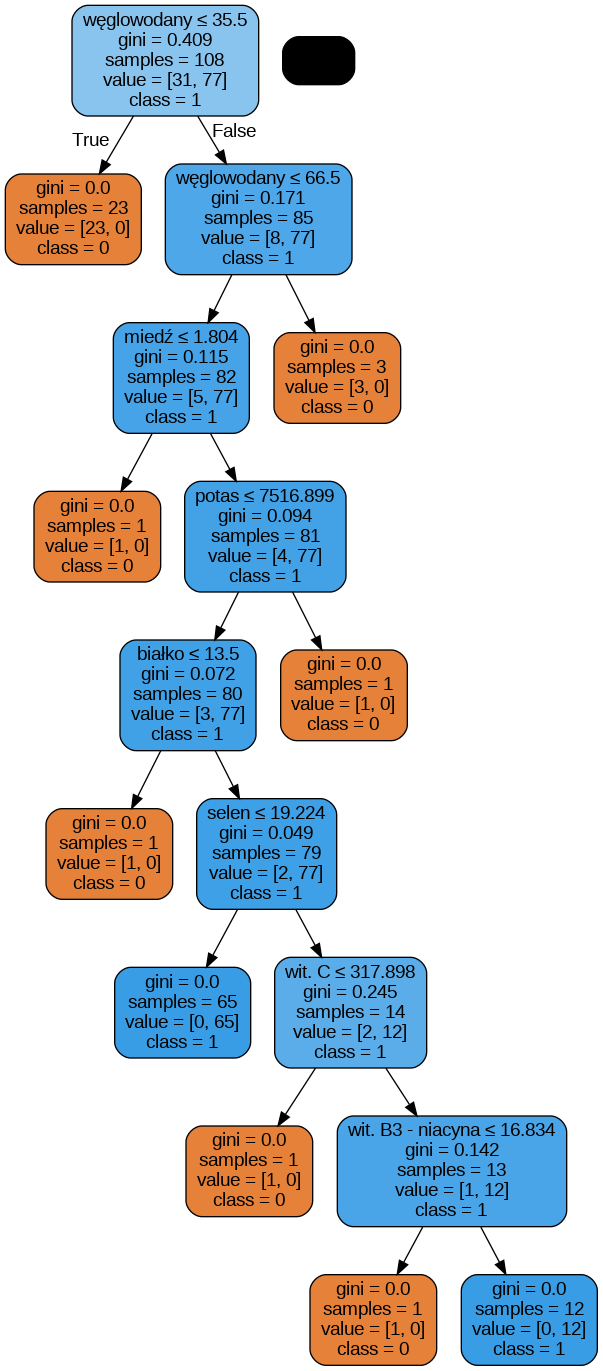

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Walidacja krzyżowa może być przydatnym sposobem walidacji jakości modelu.

Walidacja krzyżowa: Podział zbioru danych na kilka podzbiorów i naprzemienne ich używanie jako zestawy treningowe i testowe.

Zamiast StratifiedKFold można użyć KFold.

**Na czym polega różnica między StratifiedKFold i KFold?**

* W metodzie KFold dane są losowo dzielone na K równej wielkości podzbiorów (ang. folds), w których każdy z nich jest używany raz jako zbiór walidacyjny, a pozostałe K-1 jako zbiór treningowy.

* StratifiedKFold dzieli dane na K podzbiorów, ale z zachowaniem proporcji klas w każdym z podzbiorów. Oznacza to, że każdy podzbiór ma taką samą proporcję klas jak w oryginalnym zbiorze danych.

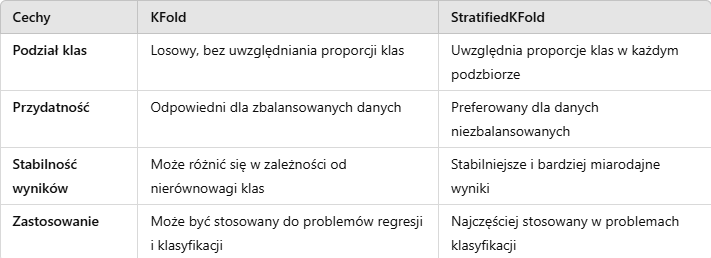

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)  # Adjust n_splits (number of folds) as needed
cv_scores1 = cross_val_score(model1, X, y, cv=skf)
cv_scores2 = cross_val_score(model2, X, y, cv=skf)

print("Average Score:", cv_scores1.mean())
print("Cross Validation Scores: ", cv_scores1)
print("Standard Deviation:", cv_scores1.std())

print("\nAverage Score:", cv_scores2.mean())
print("Cross Validation Scores: ", cv_scores2)
print("Standard Deviation:", cv_scores2.std())


Average Score: 0.8838709677419356
Cross Validation Scores:  [0.83870968 0.87096774 0.90322581 0.83870968 0.96774194]
Standard Deviation: 0.048279450151921824

Average Score: 0.8838709677419356
Cross Validation Scores:  [0.83870968 0.87096774 0.90322581 0.83870968 0.96774194]
Standard Deviation: 0.048279450151921824


**Praca samodzielna**: Wykonaj walidację wybranego modelu wykorzystując KFold zamiast StratifiedKFold.

Czy spowodowało to zmianę?

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)  # Adjust n_splits (number of folds) as needed
cv_scores1 = cross_val_score(model1, X, y, cv=kf)
cv_scores2 = cross_val_score(model2, X, y, cv=kf)

print("Average Score (KFold):", cv_scores1.mean())
print("Cross Validation Scores: ", cv_scores1)
print("Standard Deviation (KFold):", cv_scores1.std())

print("\nAverage Score (KFold):", cv_scores2.mean())
print("Cross Validation Scores: ", cv_scores2)
print("Standard Deviation (KFold):", cv_scores2.std())



Average Score (KFold): 0.8903225806451612
Cross Validation Scores:  [0.87096774 0.90322581 0.90322581 0.80645161 0.96774194]
Standard Deviation (KFold): 0.05241315099765138

Average Score (KFold): 0.8903225806451612
Cross Validation Scores:  [0.87096774 0.90322581 0.90322581 0.80645161 0.96774194]
Standard Deviation (KFold): 0.05241315099765138


Jak widać wyniki polepszy

**6. Dopracuj swój model**

Możemy odgadywać najlepsze hiperparametry modelu lub skorzystać z gotowych metod poszukiwania najlepszych hiperparametrów - np. RandomSearch lub GridSearch.

Za pomocą randomSearch/GridSearch dokonaj eksploracji hiperparametrów. Zapisz najlepsze.

In [30]:
from sklearn.model_selection import GridSearchCV


In [31]:
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['log2', 'sqrt'],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best Model Hyperparameters:", best_model.get_params())
print("Best Score:", best_score)

model1_predictions = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, model1_predictions)
conf_matrix = confusion_matrix(y_test, model1_predictions)
precision = precision_score(y_test, model1_predictions)
recall = recall_score(y_test, model1_predictions)
f1 = f1_score(y_test, model1_predictions)
roc_auc = roc_auc_score(y_test, model1_predictions)

print("confussion matrix: ",conf_matrix)
print("accuarcy: ",accuracy)
print("precision: ", precision)
print("recall: ",recall)
print("f1: ",f1)
print("roc_auc: ",roc_auc)

Best Model Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Score: 0.9119999999999999
confussion matrix:  [[ 5  6]
 [ 0 20]]
accuarcy:  0.8064516129032258
precision:  0.7692307692307693
recall:  1.0
f1:  0.8695652173913043
roc_auc:  0.7272727272727273


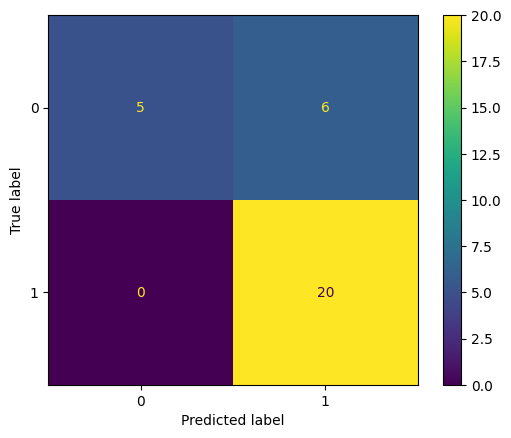

In [32]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

In [33]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': range(2, 11),  # Integer values (more efficient than randint)
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=model1, param_distributions=param_distributions, scoring='accuracy', n_iter=100)  # Adjust n_iter as needed
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_score = random_search.best_score_
print("Best Model Hyperparameters:", best_model.get_params())
print("Best Score:", best_score)

model1_predictions = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, model1_predictions)
conf_matrix = confusion_matrix(y_test, model1_predictions)
precision = precision_score(y_test, model1_predictions)
recall = recall_score(y_test, model1_predictions)
f1 = f1_score(y_test, model1_predictions)
roc_auc = roc_auc_score(y_test, model1_predictions)

print("confussion matrix: ",conf_matrix)
print("accuarcy: ",accuracy)
print("precision: ", precision)
print("recall: ",recall)
print("f1: ",f1)
print("roc_auc: ",roc_auc)

Best Model Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Score: 0.9116666666666665
confussion matrix:  [[ 5  6]
 [ 0 20]]
accuarcy:  0.8064516129032258
precision:  0.7692307692307693
recall:  1.0
f1:  0.8695652173913043
roc_auc:  0.7272727272727273


Przeprowadź walidację krzyżową i zapisz jej wyniki dla najlepszego modelu. Porównaj z poprzednimi.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': range(2, 11),  # Integer values (more efficient than randint)
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=model1, param_distributions=param_distributions, scoring='accuracy', n_iter=100)  # Adjust n_iter as needed
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_score = random_search.best_score_
print("Best Model Hyperparameters:", best_model.get_params())
print("Best Score:", best_score)

model1_predictions = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, model1_predictions)
conf_matrix = confusion_matrix(y_test, model1_predictions)
precision = precision_score(y_test, model1_predictions)
recall = recall_score(y_test, model1_predictions)
f1 = f1_score(y_test, model1_predictions)
roc_auc = roc_auc_score(y_test, model1_predictions)

print("confussion matrix: ",conf_matrix)
print("accuarcy: ",accuracy)
print("precision: ", precision)
print("recall: ",recall)
print("f1: ",f1)
print("roc_auc: ",roc_auc)

Best Model Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Score: 0.9116666666666665
confussion matrix:  [[ 5  6]
 [ 0 20]]
accuarcy:  0.8064516129032258
precision:  0.7692307692307693
recall:  1.0
f1:  0.8695652173913043
roc_auc:  0.7272727272727273


In [35]:
cv_scoresBest = cross_val_score(best_model, X, y, cv=skf)

print("Average Score:", cv_scoresBest.mean())
print("Standard Deviation:", cv_scoresBest.std())

Average Score: 0.8967741935483872
Standard Deviation: 0.055498872690597605


Random forest - alternatywny przykład modelu



In [36]:
from sklearn.ensemble import RandomForestClassifier


In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
modelRf_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, modelRf_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8709677419354839


**Praca samodzielna**: Usuń kolumnę "węglowodany". Wytrenuj ponownie model dowolnym algorytmem. Jak to wpłynęło na jego jakość?

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
import pandas as pd

def load_data():
    return pd.read_excel("sample_data/dataset.xlsx");

df1 = load_data()
df1.drop('węglowodany', axis=1, inplace=True)
df1.head()

encoder = LabelEncoder()
df1['Rodzaj stosowanej diety'] = encoder.fit_transform(df['Rodzaj stosowanej diety'])

X = df1.iloc[:,1:31]
y = df1["Scoring"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
model1_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, model1_pred)
print("Accuracy:", accuracy)



kf = KFold(n_splits=5)  # Adjust n_splits (number of folds) as needed
cv_scores1 = cross_val_score(model1, X, y, cv=kf)

print("Average Score (KFold):", cv_scores1.mean())
print("Cross Validation Scores: ", cv_scores1)
print("Standard Deviation (KFold):", cv_scores1.std())

param_distributions = {
    'max_depth': range(2, 11),  # Integer values (more efficient than randint)
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=model1, param_distributions=param_distributions, scoring='accuracy', n_iter=100)  # Adjust n_iter as needed
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_score = random_search.best_score_
print("Best Model Hyperparameters:", best_model.get_params())
print("Best Score:", best_score)




Accuracy: 0.8064516129032258
Average Score (KFold): 0.8967741935483872
Cross Validation Scores:  [0.96774194 0.83870968 0.90322581 0.83870968 0.93548387]
Standard Deviation (KFold): 0.05161290322580644
Best Model Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 17, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Best Score: 0.9199999999999999


**7. Zaprezentuj swoje rozwiązanie**

Oceń swój model. Co mówią nam poszczególne miary?

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model2 = DecisionTreeClassifier(random_state=42, max_depth=15,max_features='log2', min_samples_leaf=5, min_samples_split=20, splitter='best')
model2.fit(X_train, y_train)
model2_pred = model2.predict(X_test)


print("Accuracy of best model:", accuracy_score(y_test, model2_pred))
print("Сonfussion matrix: ", confusion_matrix(y_test, model1_predictions))
print("Precision: ", precision_score(y_test, model2_pred))
print("Recall: ", recall_score(y_test, model2_pred))
print("F1: ", f1_score(y_test, model2_pred))

Accuracy of best model: 0.8709677419354839
Сonfussion matrix:  [[ 5  6]
 [ 0 20]]
Precision:  0.8333333333333334
Recall:  1.0
F1:  0.9090909090909091


* Accuracy: Ogólna poprawność przewidywań.
* Precision: Jakość pozytywnych przewidywań (minimalizacja fałszywych wyników pozytywnych).
* Recall: Kompletność pozytywnych przewidywań (minimalizacja fałszywych wyników negatywnych).
* Confussion matrix: pokazuje, ile razy model poprawnie i błędnie sklasyfikował każdą klasę.
* F1-Score: Zrównoważona miara precyzji i przypominania.

**8. Uruchom, monitoruj i utrzymuj swój system**

Zapisanie modelu picklem. Wczytanie go i sprawdzenie dla danych testowych.

In [40]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


0.8709677419354839


# Walki modeli

Dla chętnych:
Przygotuj swój model na podstawie datasetu datasetMultiLabel.xlsx. Wykonaj preprocessing danych i strojenie modelu w taki sposób, by osiągnąć jak najlepsze wyniki. Samodzielnie wybierz, czy chcesz się zająć regresją (przedostatnia kolumna) czy klasyfikacją wielklasową (ostatnia kolumna)

Na moodlu zamieść:

> wytrenowy model (zapisany jak wyżej)



> opis osiągniętych wyników


    Best Score:
    confussion matrix:
    accuarcy:  
    precision:  
    recall:  
    f1:  